In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:05<00:00, 168MB/s]
100% 812M/812M [00:05<00:00, 158MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/train.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images', file_count)

number of images 25000


In [6]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.7528.jpg', 'cat.9003.jpg', 'cat.4870.jpg', 'dog.11947.jpg', 'cat.3387.jpg', 'dog.6203.jpg', 'dog.9575.jpg', 'dog.3623.jpg', 'dog.4727.jpg', 'cat.9019.jpg', 'cat.9292.jpg', 'cat.2127.jpg', 'cat.6520.jpg', 'cat.811.jpg', 'cat.9868.jpg', 'cat.8621.jpg', 'dog.3390.jpg', 'dog.1212.jpg', 'dog.7440.jpg', 'dog.8345.jpg', 'cat.3422.jpg', 'dog.3145.jpg', 'dog.5025.jpg', 'dog.11576.jpg', 'dog.5737.jpg', 'cat.7081.jpg', 'dog.7819.jpg', 'cat.6499.jpg', 'dog.3156.jpg', 'cat.10217.jpg', 'dog.4254.jpg', 'dog.5383.jpg', 'cat.2360.jpg', 'cat.6650.jpg', 'cat.4933.jpg', 'cat.6736.jpg', 'dog.7015.jpg', 'cat.6141.jpg', 'dog.1638.jpg', 'dog.1765.jpg', 'cat.3591.jpg', 'dog.7759.jpg', 'dog.8089.jpg', 'dog.8583.jpg', 'cat.796.jpg', 'dog.7733.jpg', 'cat.7866.jpg', 'dog.10478.jpg', 'cat.6310.jpg', 'cat.6967.jpg', 'cat.4720.jpg', 'dog.7350.jpg', 'dog.4581.jpg', 'dog.7407.jpg', 'dog.5823.jpg', 'dog.11390.jpg', 'cat.9983.jpg', 'cat.11888.jpg', 'dog.3240.jpg', 'dog.6177.jpg', 'dog.12004.jpg', 'dog.7062.jpg', 'c

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

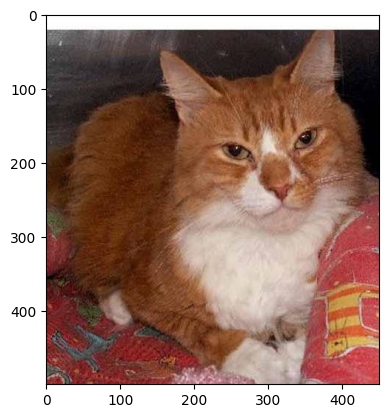

In [9]:
img = mpimg.imread('/content/train/cat.9003.jpg')
imgplt = plt.imshow(img)
plt.show()

In [10]:
file_names = os.listdir('/content/train')
dog_cnt = 0
cat_cnt = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'cat':
    cat_cnt+=1
  else:
    dog_cnt+=1

print('number of cat images: ', cat_cnt)
print('number of dog images: ', dog_cnt)

number of cat images:  12500
number of dog images:  12500


In [11]:
os.mkdir('/content/img_resized')

In [12]:
original_folder = '/content/train/'
resized_folder = '/content/img_resized/'

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  img_path = original_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_image_path = resized_folder+file_name
  img.save(new_image_path)

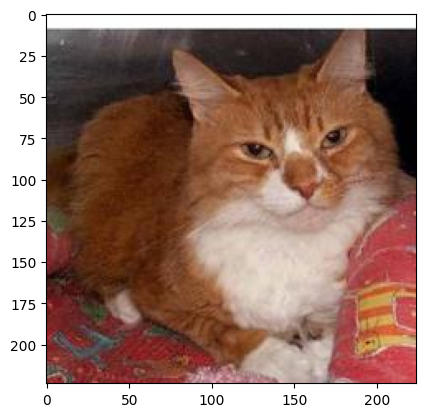

In [13]:
img = mpimg.imread('/content/img_resized/cat.9003.jpg')
imgplt = plt.imshow(img)
plt.show()

### cat=0, dog=1

In [14]:
labels = []
file_names = os.listdir('/content/img_resized')
for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'cat':
    labels.append(0)
  else:
    labels.append(1)


In [15]:
print(file_names[0:5])
print(len(file_names))

['cat.7528.jpg', 'cat.9003.jpg', 'cat.4870.jpg', 'dog.11947.jpg', 'cat.3387.jpg']
2000


In [16]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [17]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 956 1044]


In [18]:
import cv2
import glob

In [19]:
image_dir = '/content/img_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [20]:
print(dog_cat_images)

[[[[121 162 157]
   [119 160 155]
   [122 163 158]
   ...
   [195 218 213]
   [200 224 216]
   [204 229 219]]

  [[120 161 156]
   [130 171 166]
   [136 177 172]
   ...
   [194 217 212]
   [201 225 217]
   [205 230 220]]

  [[133 173 171]
   [137 177 175]
   [131 171 169]
   ...
   [182 205 200]
   [191 215 207]
   [197 222 212]]

  ...

  [[125 161 147]
   [117 153 139]
   [115 151 137]
   ...
   [149 186 178]
   [144 181 173]
   [142 179 171]]

  [[127 163 149]
   [114 150 136]
   [115 151 137]
   ...
   [145 183 177]
   [138 176 170]
   [138 176 170]]

  [[119 155 141]
   [105 141 127]
   [111 147 133]
   ...
   [150 188 182]
   [140 178 172]
   [137 175 169]]]


 [[[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [254 255 253]
   [254 255 253]
   [254 255

In [21]:
print(type(dog_cat_images))

<class 'numpy.ndarray'>


In [22]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [23]:
X = dog_cat_images
y = np.asarray(labels)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
print(X_train.shape, X_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3)


In [27]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
X_train_scaled

array([[[[0.02745098, 0.02745098, 0.02745098],
         [0.02352941, 0.02352941, 0.02352941],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.02352941, 0.02352941, 0.02352941],
         [0.02745098, 0.02745098, 0.02745098],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627]],

        ...,

        [[0.87843137, 0.91372549, 0.95294118],
         [0.87058824, 0.90588235, 0.94509804]

### Neural network

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

In [30]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [31]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [33]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [34]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 10s 40ms/step - loss: 0.1832 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0600 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0442 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 2s 45ms/step - loss: 0.0332 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 2s 47ms/step - loss: 0.0291 - acc: 0.9931


In [35]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test loss: ', score)
print('Test accuracy: ', acc)

13/13 [==============================] - 3s 119ms/step - loss: 0.0589 - acc: 0.9725
Test loss:  0.05894709751009941
Test accuracy:  0.9725000262260437


In [36]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predictive system

Path of the image: /content/test2.jpg


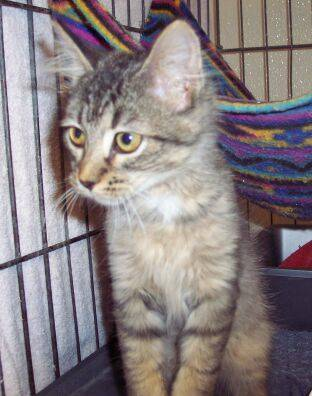

1/1 [==============================] - 0s 31ms/step
[[ 6.017485 -3.965797]]
It's Cat


In [44]:
input_img_path = input('Path of the image: ')
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resized = cv2.resize(input_img, (224,224))
input_img_scaled = input_img_resized/255
image_reshaped = np.reshape(input_img_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
input_prediction

if input_pred_label == 0:
  print('It\'s Cat')
else:
  print('It\'s Dog')